In [1]:
from merge_years.import_data import get_full_data



In [2]:
complete_data=get_full_data('../raw_data')
complete_data.shape

(114992, 38)

In [3]:
complete_data.columns

Index(['name', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity',
       'element', 'fixture', 'goals_conceded', 'goals_scored', 'ict_index',
       'influence', 'kickoff_time', 'minutes', 'opponent_team', 'own_goals',
       'penalties_missed', 'penalties_saved', 'red_cards', 'saves', 'selected',
       'team_a_score', 'team_h_score', 'threat', 'total_points',
       'transfers_balance', 'transfers_in', 'transfers_out', 'value',
       'was_home', 'yellow_cards', 'GW', 'season', 'position',
       'dreamteam_yearly_average', 'team_id', 'team_name', 'kickoff_date'],
      dtype='object')

In [4]:
complete_data

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,value,was_home,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,kickoff_date
0,aaron connolly,0,0,1,0,0.1,534,37,1,0,...,45,False,0,4,20,FWD,NaN,4.0,Brighton,2019-08-31
1,aaron connolly,0,0,1,0,0.3,534,43,1,0,...,45,True,0,5,20,FWD,NaN,4.0,Brighton,2019-09-14
2,aaron connolly,0,0,1,0,4.8,534,58,0,0,...,45,False,0,6,20,FWD,NaN,4.0,Brighton,2019-09-21
3,aaron connolly,0,0,2,0,0.6,534,63,1,0,...,45,False,0,7,20,FWD,NaN,4.0,Brighton,2019-09-28
4,aaron connolly,0,3,53,1,23.8,534,72,0,2,...,45,True,0,8,20,FWD,NaN,4.0,Brighton,2019-10-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114987,ørjan nyland,0,0,0,0,0.0,35,340,0,0,...,40,True,0,35,21,GK,0.0,2.0,Aston Villa,2021-05-09
114988,ørjan nyland,0,0,0,0,0.0,35,180,0,0,...,40,True,0,35,21,GK,0.0,2.0,Aston Villa,2021-05-13
114989,ørjan nyland,0,0,0,0,0.0,35,355,0,0,...,40,False,0,36,21,GK,0.0,2.0,Aston Villa,2021-05-16
114990,ørjan nyland,0,0,0,0,0.0,35,367,0,0,...,40,False,0,37,21,GK,0.0,2.0,Aston Villa,2021-05-19


In [5]:
import pandas as pd

# Hi ARMIN the following two cells can be used to make two new columns. The first makes opponent_level and the other makes team_level

In [7]:
team_playing_home_20={
    1:1180,
    2:1020,
    3:1020,
    4:1050,
    5:1110,
    6:1220,
    7:1130,
    8:1100,
    9:1210,
    10:1340,
    11:1330,
    12:1220,
    13:1090,
    14:980,
    15:1180,
    16:1150,
    17:1180,
    18:1030,
    19:1040,
    20:1230
}

team_playing_away_20={
    1:1240,
    2:1050,
    3:1020,
    4:1010,
    5:1180,
    6:1230,
    7:1120,
    8:1240,
    9:1160,
    10:1350,
    11:1340,
    12:1300,
    13:1100,
    14:1020,
    15:1200,
    16:1040,
    17:1240,
    18:1140,
    19:1030,
    20:1190
}

team_playing_home_21={
    1:1200,
    2:1100,
    3:1130,
    4:1060,
    5:1250,
    6:1090,
    7:1250,
    8:1090,
    9:1240,
    10:1160,
    11:1250,
    12:1340,
    13:1250,
    14:1050,
    15:1000,
    16:1060,
    17:1190,
    18:1050,
    19:1230,
    20:1080
}

team_playing_away_21={
    1:1250,
    2:1160,
    3:1130,
    4:1070,
    5:1280,
    6:1110,
    7:1130,
    8:1100,
    9:1260,
    10:1170,
    11:1210,
    12:1360,
    13:1320,
    14:1070,
    15:1040,
    16:1100,
    17:1250,
    18:1040,
    19:1260,
    20:1110
}

df17=complete_data.loc[complete_data['season'] == 17].copy()

df18=complete_data.loc[complete_data['season'] == 18].copy()

df19=complete_data.loc[complete_data['season'] == 19].copy()

df20=complete_data.loc[complete_data['season'] == 20].copy()
level=[]
for i,row in df20.iterrows():
    if row.was_home==True:
        level.append(team_playing_away_20[row['opponent_team']])
    else:
        level.append(team_playing_home_20[row['opponent_team']])
df20['opponent_level']=level

df21=complete_data.loc[complete_data['season'] == 21].copy()
level=[]
for i,row in df21.iterrows():
    if row.was_home==True:
        level.append(team_playing_away_21[row['opponent_team']])
    else:
        level.append(team_playing_home_21[row['opponent_team']])
df21['opponent_level']=level

complete_data = pd.concat([df17,df18,df19,df20,df21])

In [8]:


df17=complete_data.loc[complete_data['season'] == 17].copy()

df18=complete_data.loc[complete_data['season'] == 18].copy()

df19=complete_data.loc[complete_data['season'] == 19].copy()

df20=complete_data.loc[complete_data['season'] == 20].copy()
level=[]
for i,row in df20.iterrows():
    if row.was_home==False:
        level.append(team_playing_away_20[row['team_id']])
    else:
        level.append(team_playing_home_20[row['team_id']])
df20['team_level']=level

df21=complete_data.loc[complete_data['season'] == 21].copy()
level=[]
for i,row in df21.iterrows():
    if row.was_home==False:
        level.append(team_playing_away_21[row['team_id']])
    else:
        level.append(team_playing_home_21[row['team_id']])
df21['team_level']=level

complete_data = pd.concat([df17,df18,df19,df20,df21])

In [9]:
complete_data

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,kickoff_date,opponent_level,team_level
73,aaron cresswell,0,0,0,0,0.0,454,10,0,0,...,0,1,17,DEF,NaN,NaN,NaN,2016-08-15,NaN,NaN
74,aaron cresswell,0,0,0,0,0.0,454,20,0,0,...,0,2,17,DEF,NaN,NaN,NaN,2016-08-21,NaN,NaN
75,aaron cresswell,0,0,0,0,0.0,454,29,0,0,...,0,3,17,DEF,NaN,NaN,NaN,2016-08-28,NaN,NaN
76,aaron cresswell,0,0,0,0,0.0,454,38,0,0,...,0,4,17,DEF,NaN,NaN,NaN,2016-09-10,NaN,NaN
77,aaron cresswell,0,0,0,0,0.0,454,46,0,0,...,0,5,17,DEF,NaN,NaN,NaN,2016-09-17,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114987,ørjan nyland,0,0,0,0,0.0,35,340,0,0,...,0,35,21,GK,0.0,2.0,Aston Villa,2021-05-09,1320.0,1100.0
114988,ørjan nyland,0,0,0,0,0.0,35,180,0,0,...,0,35,21,GK,0.0,2.0,Aston Villa,2021-05-13,1130.0,1100.0
114989,ørjan nyland,0,0,0,0,0.0,35,355,0,0,...,0,36,21,GK,0.0,2.0,Aston Villa,2021-05-16,1090.0,1160.0
114990,ørjan nyland,0,0,0,0,0.0,35,367,0,0,...,0,37,21,GK,0.0,2.0,Aston Villa,2021-05-19,1190.0,1160.0


In [10]:
import matplotlib.pyplot as plt

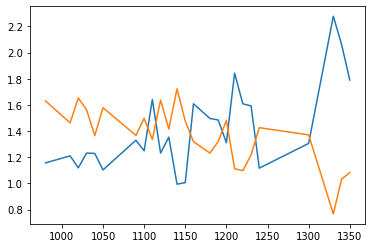

In [12]:
plt.plot(df20[['total_points','team_level']].groupby('team_level').mean())
plt.plot(df20[['total_points','opponent_level']].groupby('opponent_level').mean())

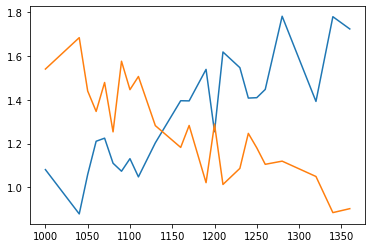

In [13]:
plt.plot(df21[['total_points','team_level']].groupby('team_level').mean())
plt.plot(df21[['total_points','opponent_level']].groupby('opponent_level').mean())

In [14]:
complete_data.tail()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,kickoff_date,opponent_level,team_level
114987,ørjan nyland,0,0,0,0,0.0,35,340,0,0,...,0,35,21,GK,0.0,2.0,Aston Villa,2021-05-09,1320.0,1100.0
114988,ørjan nyland,0,0,0,0,0.0,35,180,0,0,...,0,35,21,GK,0.0,2.0,Aston Villa,2021-05-13,1130.0,1100.0
114989,ørjan nyland,0,0,0,0,0.0,35,355,0,0,...,0,36,21,GK,0.0,2.0,Aston Villa,2021-05-16,1090.0,1160.0
114990,ørjan nyland,0,0,0,0,0.0,35,367,0,0,...,0,37,21,GK,0.0,2.0,Aston Villa,2021-05-19,1190.0,1160.0
114991,ørjan nyland,0,0,0,0,0.0,35,370,0,0,...,0,38,21,GK,0.0,2.0,Aston Villa,2021-05-23,1280.0,1100.0


In [15]:
df21=complete_data.loc[complete_data['season'] == 21].copy()

In [16]:
df21.head()

,name,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,...,yellow_cards,GW,season,position,dreamteam_yearly_average,team_id,team_name,kickoff_date,opponent_level,team_level
35,aaron connolly,0,0,-3,0,0.3,78,7,2,0,...,0,1,21,FWD,7.0,3.0,Brighton,2020-09-14,1280.0,1130.0
36,aaron connolly,0,2,27,1,11.3,78,16,0,1,...,0,2,21,FWD,7.0,3.0,Brighton,2020-09-20,1050.0,1130.0
37,aaron connolly,0,0,2,0,12.1,78,19,2,0,...,0,3,21,FWD,7.0,3.0,Brighton,2020-09-26,1320.0,1130.0
38,aaron connolly,0,0,7,0,0.3,78,32,3,0,...,0,4,21,FWD,7.0,3.0,Brighton,2020-10-03,1250.0,1130.0
39,aaron connolly,1,0,13,0,10.3,78,40,0,0,...,0,5,21,FWD,7.0,3.0,Brighton,2020-10-18,1090.0,1130.0


In [18]:
df21.shape

(24420, 40)